## Youtube Video Trending Prediction


Author: Anita Huang

Course Project, UC Irvine, Math 10, S24

I would like to post my notebook on the course’s website. Yes

## Introduction
- In this project, I tried to conduct a comprehensive analysis of trending YouTube videos in Japan. The goal was to identify key factors that influence the popularity of these videos. Through a systematic approach that included data cleaning, exploratory data analysis, and predictive modeling, I was able to gain several important insights.

## Exploratory Data Analysis

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk 
import random

SEED = 123
np.random.seed(SEED)

In [2]:
# videos = pd.read_csv("JPvideos.csv", encoding='shift_jis', errors='replace')
videos = pd.read_csv('JPvideos.csv', encoding='utf-8', quotechar='"', delimiter=',', encoding_errors='ignore')
videos['category_id'] = pd.to_numeric(videos['category_id'])
videos['views'] = pd.to_numeric(videos['views'])
videos['tags'] = videos['tags'].str.split('|')
videos['like_dislike_ratio'] = videos['likes']/videos['dislikes']
videos['like_views_ratio'] = videos['likes']/videos['views']
videos['publish_time'] = pd.to_datetime(videos['publish_time'])

In [3]:
videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like_dislike_ratio,like_views_ratio
0,5ugKfHgsmYw,18.07.02,陸自ヘリ、垂直に落下＝路上の車が撮影,時事通信映像センター,25,2018-02-06 03:04:37+00:00,"[事故, ""佐賀"", ""佐賀県"", ""ヘリコプター"", ""ヘリ"", ""自衛隊"", ""墜落"",...",188085,591,189,0,https://i.ytimg.com/vi/5ugKfHgsmYw/default.jpg,True,False,False,佐賀県神埼市の民家に墜落した陸上自衛隊のＡＨ６４Ｄ戦闘ヘリコプターが垂直に落下する様子を、近...,3.126984,0.003142
1,ohObafdd34Y,18.07.02,イッテQ お祭り男宮川×手越 巨大ブランコ②,神谷えりな Kamiya Erina 2,1,2018-02-06 04:01:56+00:00,[[none]],90929,442,88,174,https://i.ytimg.com/vi/ohObafdd34Y/default.jpg,False,False,False,NaN,5.022727,0.004861
2,aBr2kKAHN6M,18.07.02,Live Views of Starman,SpaceX,28,2018-02-06 21:38:22+00:00,[[none]],6408303,165892,2331,3006,https://i.ytimg.com/vi/aBr2kKAHN6M/default.jpg,False,False,False,NaN,71.167739,0.025887
3,5wNnwChvmsQ,18.07.02,東京ディズニーリゾートの元キャストが暴露した秘密5選,アシタノワダイ,25,2018-02-06 06:08:49+00:00,[アシタノワダイ],96255,1165,277,545,https://i.ytimg.com/vi/5wNnwChvmsQ/default.jpg,False,False,False,東京ディズニーリゾートの元キャストが暴露した秘密5選\n\nかたまりクリエイトさま\n【検証...,4.205776,0.012103
4,B7J47qFvdsk,18.07.02,榮倉奈々、衝撃の死んだふり！映画『家に帰ると妻が必ず死んだふりをしています。』特報,シネマトゥデイ,1,2018-02-06 02:30:00+00:00,[[none]],108408,1336,74,201,https://i.ytimg.com/vi/B7J47qFvdsk/default.jpg,False,False,False,家に帰ってきたサラリーマンのじゅん（安田顕）は、玄関で血を出して倒れている妻ちえ（榮倉奈々）...,18.054054,0.012324


In [4]:
videos['trending_date'] = pd.to_datetime(videos['trending_date'], format='%y.%d.%m', utc=True)
videos['time_till_trending'] = videos['trending_date'] - videos['publish_time']

# Align datetime object format for tableau analysis
videos['publish_time'] = videos['publish_time'].dt.strftime('%Y-%m-%dT%H:%M:%S')
videos['trending_date'] = videos['trending_date'].dt.strftime('%Y-%m-%dT%H:%M:%S')

In [5]:
videos['hours_till_trending'] = videos['time_till_trending'].map(lambda x: x.total_seconds()) / 3600
videos['days_till_trending'] = videos['time_till_trending'].map(lambda x: x.total_seconds()) / (3600*24)

In [6]:
videos[['trending_date','publish_time','time_till_trending','days_till_trending']].head()

,trending_date,publish_time,time_till_trending,days_till_trending
0,2018-02-07T00:00:00,2018-02-06T03:04:37,0 days 20:55:23,0.871794
1,2018-02-07T00:00:00,2018-02-06T04:01:56,0 days 19:58:04,0.831991
2,2018-02-07T00:00:00,2018-02-06T21:38:22,0 days 02:21:38,0.098356
3,2018-02-07T00:00:00,2018-02-06T06:08:49,0 days 17:51:11,0.743877
4,2018-02-07T00:00:00,2018-02-06T02:30:00,0 days 21:30:00,0.895833


In [7]:
videos.to_csv('JP_videos.csv')

In [8]:
category = pd.read_json("JP_category_id.json")
category = pd.json_normalize(category['items'])

In [9]:
category['id'] = pd.to_numeric(category['id'])
#category.to_csv('JP_videos_category.csv')
videos = videos.merge(category,how='inner',left_on='category_id', right_on='id')

In [10]:
videos.dropna()
#videos.to_csv('JP_videos_complete.csv')
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20505 entries, 0 to 20504
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   video_id                20505 non-null  object         
 1   trending_date           20505 non-null  object         
 2   title                   20505 non-null  object         
 3   channel_title           20505 non-null  object         
 4   category_id             20505 non-null  int64          
 5   publish_time            20505 non-null  object         
 6   tags                    20505 non-null  object         
 7   views                   20505 non-null  int64          
 8   likes                   20505 non-null  int64          
 9   dislikes                20505 non-null  int64          
 10  comment_count           20505 non-null  int64          
 11  thumbnail_link          20505 non-null  object         
 12  comments_disabled       20505 no

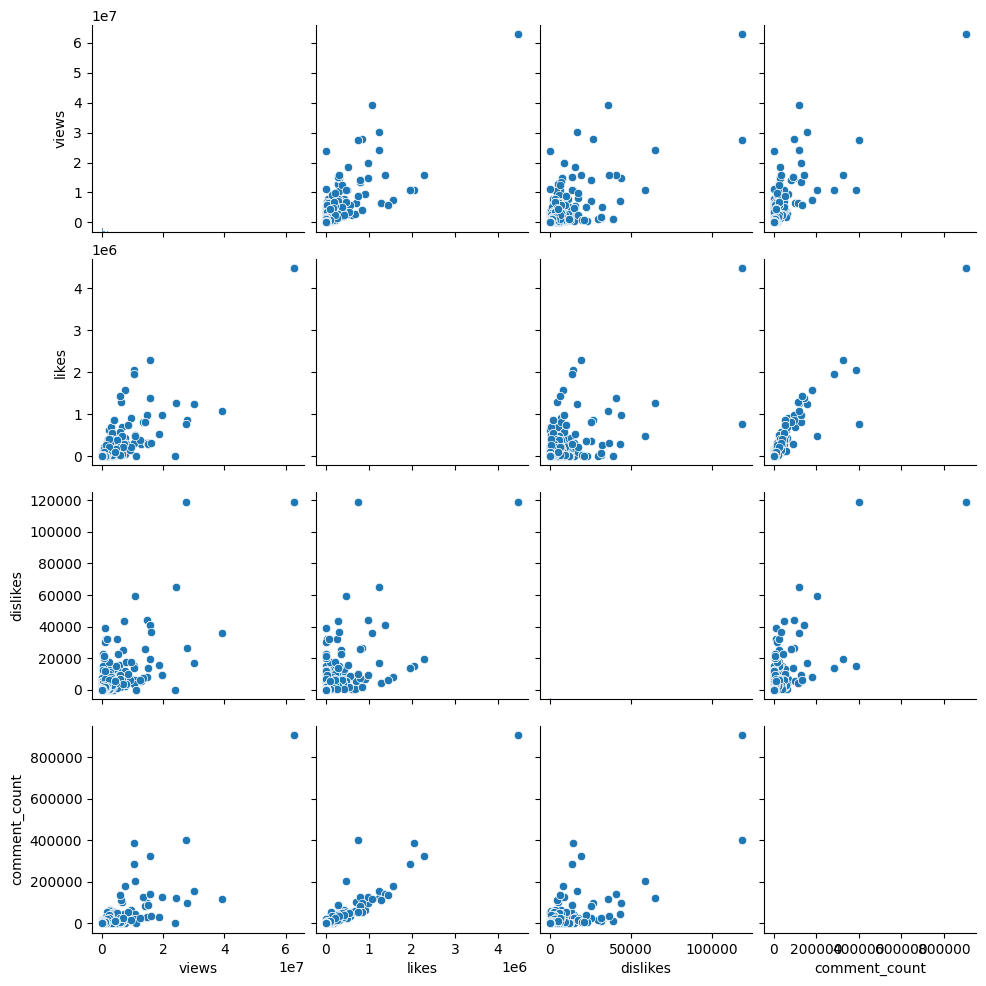

In [11]:
sns.pairplot(videos, vars=videos.columns[7:11])

Finding relationships between numeric variables and possible linear relationships between likes and dislikes
- Multiple linear lines in a pair plot suggest that there may be linear relationships between Views, Likes, Dislikes, and # of Comments, but these relationships may be different within each video category.
or dominated by video content.

In [12]:
videos.sort_values(by=['likes'], ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,like_views_ratio,time_till_trending,hours_till_trending,days_till_trending,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
16331,7C2z4GqqS5E,2018-05-20T00:00:00,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄...",62796390,4470923,119053,...,0.071197,1 days 14:59:58,38.999444,1.624977,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
16317,7C2z4GqqS5E,2018-05-20T00:00:00,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄...",62796390,4470923,119053,...,0.071197,1 days 14:59:58,38.999444,1.624977,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
16303,7C2z4GqqS5E,2018-05-20T00:00:00,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄...",62796390,4470923,119053,...,0.071197,1 days 14:59:58,38.999444,1.624977,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
16289,7C2z4GqqS5E,2018-05-20T00:00:00,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄...",62796390,4470923,119053,...,0.071197,1 days 14:59:58,38.999444,1.624977,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
14599,p8npDG2ulKQ,2018-05-08T00:00:00,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,ibighit,10,2018-05-06T15:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄""]",15875379,2285436,19400,...,0.143961,1 days 08:59:58,32.999444,1.374977,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True


In [13]:
videos.sort_values(by=['views'],ascending=False).head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,like_views_ratio,time_till_trending,hours_till_trending,days_till_trending,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
16289,7C2z4GqqS5E,2018-05-20T00:00:00,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄...",62796390,4470923,119053,...,0.071197,1 days 14:59:58,38.999444,1.624977,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
16303,7C2z4GqqS5E,2018-05-20T00:00:00,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄...",62796390,4470923,119053,...,0.071197,1 days 14:59:58,38.999444,1.624977,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
16317,7C2z4GqqS5E,2018-05-20T00:00:00,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄...",62796390,4470923,119053,...,0.071197,1 days 14:59:58,38.999444,1.624977,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
16331,7C2z4GqqS5E,2018-05-20T00:00:00,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02,"[BIGHIT, ""빅히트"", ""방탄소년단"", ""BTS"", ""BANGTAN"", ""방탄...",62796390,4470923,119053,...,0.071197,1 days 14:59:58,38.999444,1.624977,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
12338,u9Mv98Gr5pY,2018-04-26T00:00:00,VENOM - Official Trailer (HD),Sony Pictures Entertainment,24,2018-04-24T03:45:03,"[Venom, ""Venom Movie"", ""Venom (2018)"", ""Marvel...",39128403,1077732,35764,...,0.027543,1 days 20:14:57,44.249167,1.843715,youtube#videoCategory,"""XI7nbFXulYBIpL0ayR_gDh3eu1k/UVB9oxX2Bvqa_w_y3...",24,UCBR8-60-B28hp2BmDPdntcQ,Entertainment,True


In [14]:
videos.groupby('snippet.title')['views'].mean().sort_values(ascending=False).head()

snippet.title
Science & Technology    1.213748e+06
Music                   8.297243e+05
Comedy                  3.781614e+05
Sports                  2.850889e+05
Entertainment           2.821966e+05
Name: views, dtype: float64

Based on the previous analysis, amongst the previously trending videos, a significant portion is in  "music" category.

In [15]:
videos[videos['snippet.title']=='People & Blogs']['like_views_ratio'].describe()

count    3915.000000
mean        0.015004
std         0.020466
min         0.000000
25%         0.002627
50%         0.006597
75%         0.020536
max         0.194951
Name: like_views_ratio, dtype: float64

Now We try to determine the videos that were trending because of "fake views" (those with possibly flawed views), especially in "people and blog" catergory, by checking if some videos' like-view ratio is considered as outlier.

In [16]:
fake = videos[(videos['snippet.title']=='People & Blogs')&(videos['like_views_ratio']<0.01)]
fake.shape

(2287, 27)

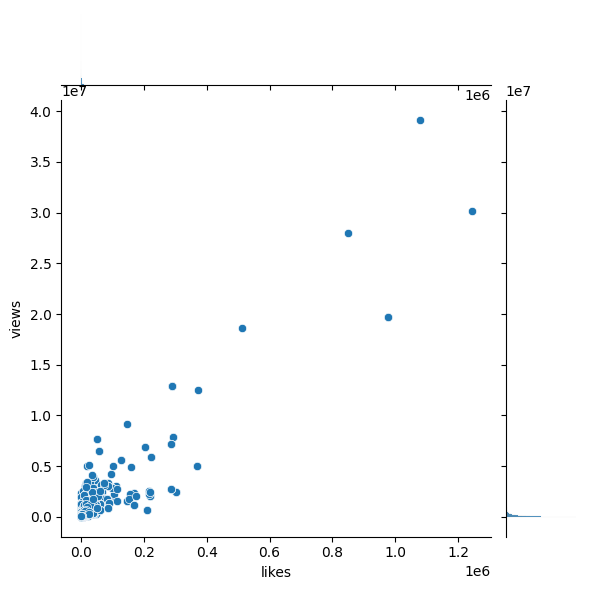

In [17]:
sns.jointplot(x='likes',y='views',data=videos[videos['snippet.title']=='Entertainment'])

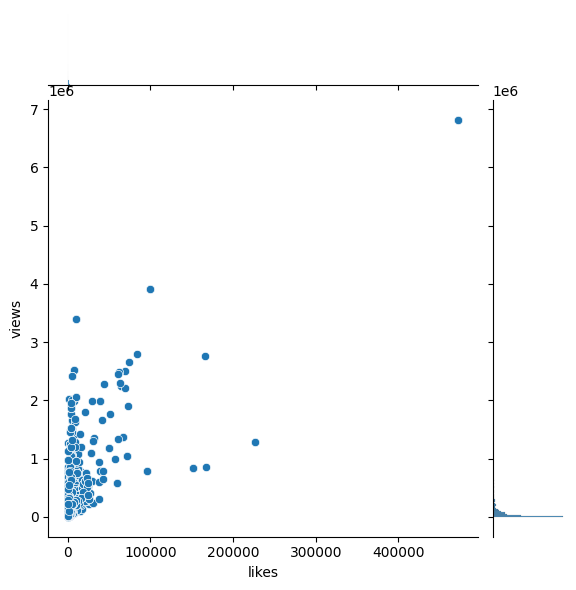

In [18]:
sns.jointplot(x='likes',y='views',data=videos[videos['snippet.title']=='People & Blogs'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20505 entries, 0 to 20504
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   video_id                20505 non-null  object         
 1   trending_date           20505 non-null  object         
 2   title                   20505 non-null  object         
 3   channel_title           20505 non-null  object         
 4   category_id             20505 non-null  int64          
 5   publish_time            20505 non-null  object         
 6   tags                    20505 non-null  object         
 7   views                   20505 non-null  int64          
 8   likes                   20505 non-null  int64          
 9   dislikes                20505 non-null  int64          
 10  comment_count           20505 non-null  int64          
 11  thumbnail_link          20505 non-null  object         
 12  comments_disabled       20505 no

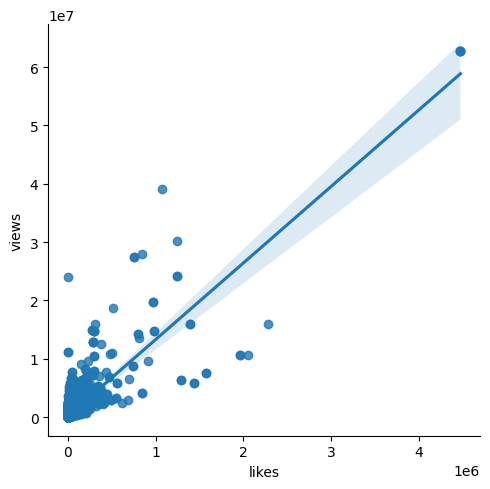

In [19]:
sns.lmplot(x='likes',y='views',data=videos)
videos.info()

## What kind of videos are the "most popular" ones?

### Plots for Different Categories 
- Here we use aggregate heatmap to analyze the popularity of each catergory

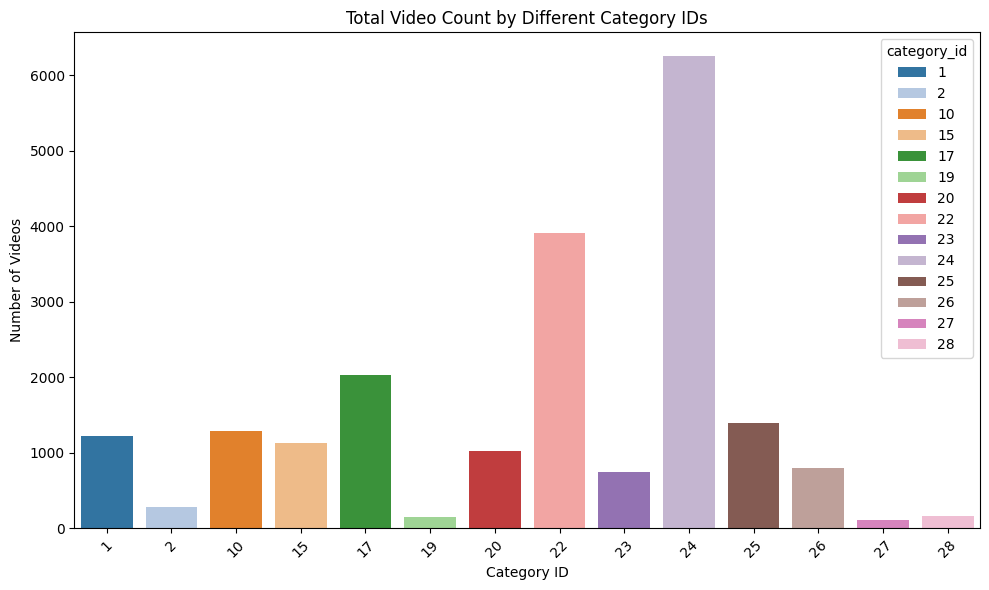

In [21]:
video_count_by_category = videos['category_id'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
current_palette = sns.color_palette("tab20", n_colors=14) 
sns.barplot(x=video_count_by_category.index, y=video_count_by_category.values, hue=video_count_by_category.index, palette=current_palette) 
plt.title('Total Video Count by Different Category IDs')
plt.xlabel('Category ID')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)  # Rotates the category ID labels for better readability
plt.tight_layout()
plt.show()


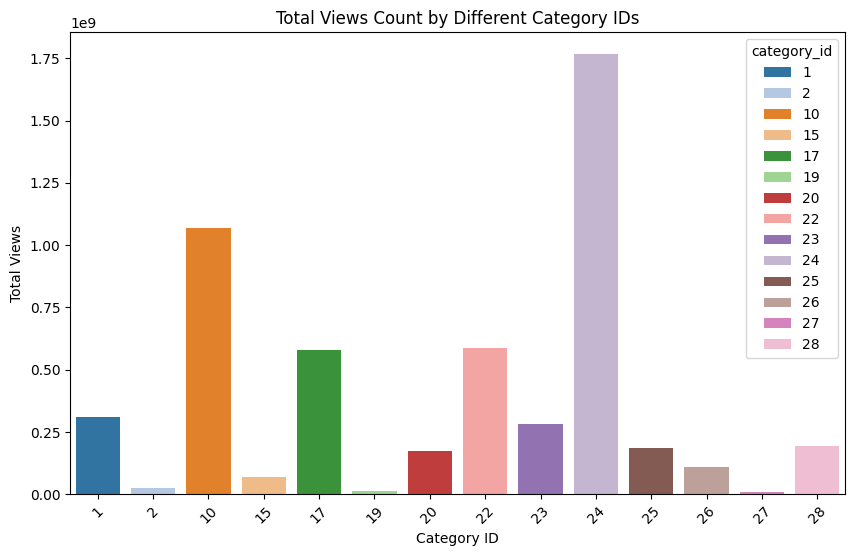

In [22]:
# Aggregate total views by category_id
total_views_by_category = videos.groupby('category_id')['views'].sum()

# Sort the data for better visualization
total_views_by_category = total_views_by_category.sort_values(ascending=False)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=total_views_by_category.index, y=total_views_by_category.values, hue=total_views_by_category.index, palette=current_palette) 
plt.title('Total Views Count by Different Category IDs')
plt.xlabel('Category ID')
plt.ylabel('Total Views')
plt.xticks(rotation=45)  # Rotates the category ID labels for better readability
plt.show()


In [23]:
videos[videos['category_id'] == 24]['snippet.title'].unique()

array(['Entertainment'], dtype=object)

Based on the histogram, videos in "Music" category have the greatest total views.

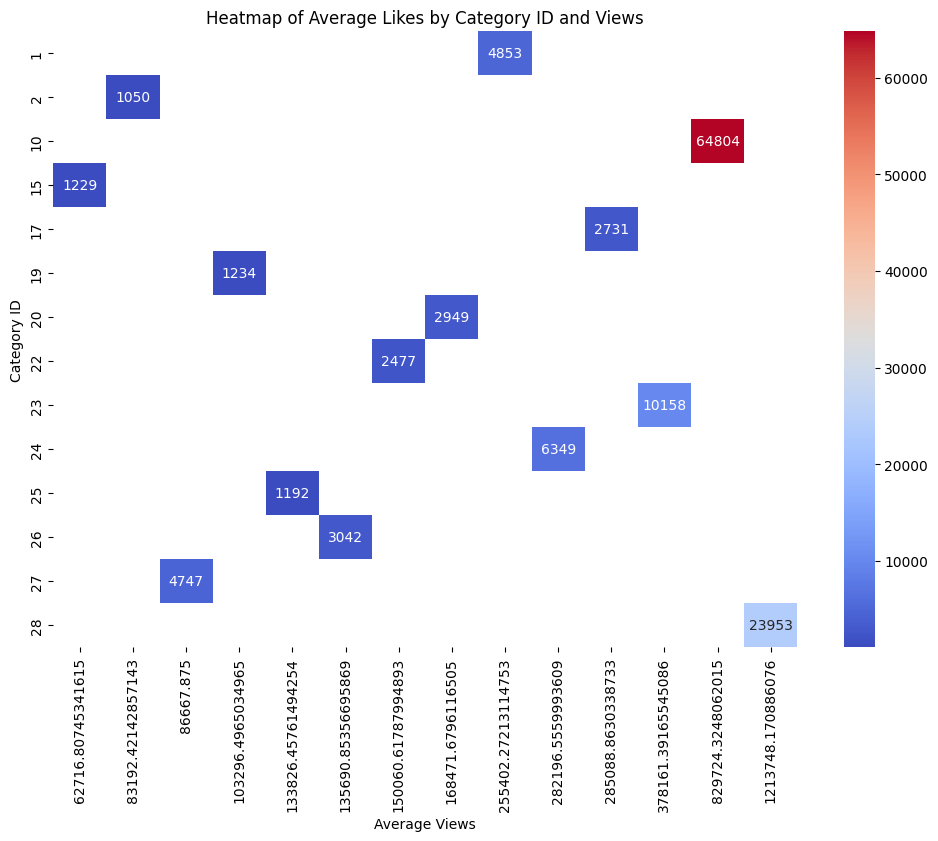

In [24]:
# For an Aggregated Heatmap, we first need to aggregate the data.
# Let's create an aggregated DataFrame with mean views, likes, dislikes, and comment counts for each category

# Aggregating the data
agg_data = videos.groupby('category_id').agg({
    'views': 'mean',
    'likes': 'mean',
    'dislikes': 'mean',
    'comment_count': 'mean'
}).reset_index()

pivot_table = agg_data.pivot(index="category_id", columns="views", values="likes")

# Continue with your plotting code
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap = 'coolwarm')
plt.title("Heatmap of Average Likes by Category ID and Views")
plt.ylabel("Category ID")
plt.xlabel("Average Views")
plt.show()


In [25]:
videos[videos['category_id'] == 10]['snippet.title'].unique()

array(['Music'], dtype=object)

Based on the aggregate heatmap, videos in "Music" category tend to be those with the popular.

### Linear Regression for Fraud Check

In [26]:
# For music category
df = videos[videos['snippet.title']=='Music']
# df = videos

In [27]:
from sklearn.model_selection import train_test_split
y = df['views']
X = df[['likes','dislikes','comment_count']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.coef_, lm.intercept_

(array([1678710.4584304 , 1985409.18248571,  576865.44128654]),
 879282.0397286821)

Text(0, 0.5, 'Predicted Y')

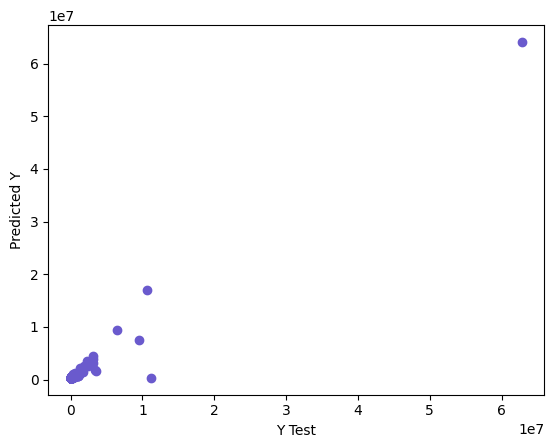

In [28]:
pred_1 = lm.predict(X_test)
plt.scatter(y_test,pred_1,color="slateblue")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [29]:
## RMSE
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test,pred_1))
print("RMSE:",np.sqrt(mean_squared_error(y_test,pred_1)))

MSE: 791171311427.6908
RMSE: 889478.1118317025


In [30]:
## R^2
from sklearn.metrics import r2_score
r2_score(y_test, pred_1)

0.9525663278976524

### Identify Outliers and Remove Them

In [31]:
# Calculate residuals
pred_df = lm.predict(X.values)  # Use training data for predictions
residuals = y - pred_df  # Calculate residuals for the entire DataFrame

# Set a threshold for identifying outliers (e.g., 3 standard deviations)
threshold = 3 * np.std(residuals)

# Identify outliers
outliers = np.abs(residuals) > (threshold+np.mean(residuals))

# Create a cleaned DataFrame (excluding outliers)
df_clean = df[~outliers]


MSE: 954687579800.9286
R^2: 0.7166970758420361


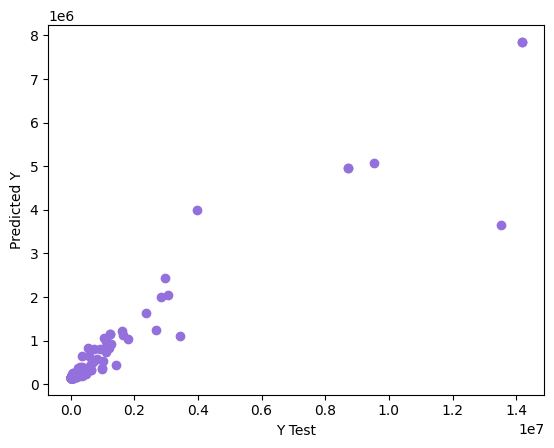

In [32]:
y1 = df_clean['views']
X1 = df_clean[['likes','dislikes','comment_count']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.fit_transform(X1_test)
lm1 = LinearRegression()
lm1.fit(X1_train,y1_train)
pred_11 = lm1.predict(X1_test)
plt.scatter(y1_test,pred_11, color="mediumpurple")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print("MSE:",mean_squared_error(y1_test,pred_11))
print("R^2:",r2_score(y1_test, pred_11))

We try to use different machine learning models to predict the trending status of videos. Models such as ridge regression, decision trees, and random forests were trained and evaluated. The performance of these models was measured using appropriate metrics to provide a robust framework for prediction.

### Decision Tree Regression

In [33]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train, y_train)
pred_2 = dt.predict(X_test)

In [34]:
# MSE
print("MSE:",mean_squared_error(y_test,pred_2))

MSE: 757936993054.9852


In [35]:
# R^2
r2_score(y_test, pred_2)

0.9545588492864666

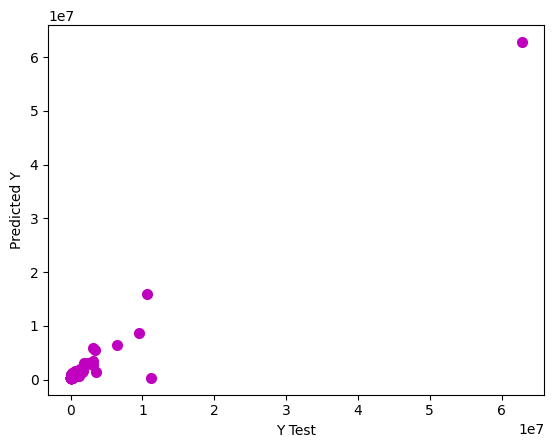

In [36]:
plt.figure()
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.scatter(y_test, pred_2, color="m", label="max_depth=2", linewidth=2)

### Random Forest Regression

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=123)
rf.fit(X_train, y_train)
pred_3 = rf.predict(X_test)

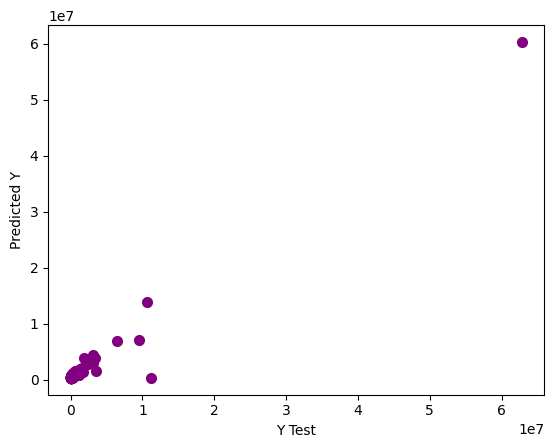

In [38]:
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.scatter(y_test, pred_3, color="purple", linewidth=2)

In [39]:
## R^2
r2_score(y_test, pred_3)

0.955550878511539

### Ridge Regression

In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

In [41]:

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Ridge model
rg = Ridge(alpha=1.0)  # Adjust alpha as needed

# Train the model
rg.fit(X_train, y_train)

# Make predictions
pred_4 = rg.predict(X_test)

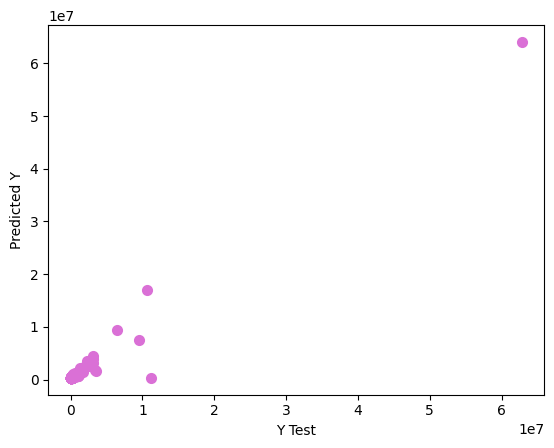

In [42]:
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.scatter(y_test, pred_4, color="orchid", linewidth=2)

In [43]:
## R^2
r2_score(y_test, pred_4)

0.9525963263828874

### 10-fold Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score

# Linear model
score_lm = cross_val_score(lm,X,y,cv=10)
score_lm.mean()

0.7723659637449632

In [45]:
# Decision tree regression
score_dt = cross_val_score(dt,X,y,cv=10)
score_dt.mean()

0.5014532073170431

In [46]:
# Random forest regression
score_dt = cross_val_score(rf,X,y,cv=10)
score_dt.mean()

0.5874674659994525

In [47]:
# Lasso Regression
score_dt = cross_val_score(rf,X,y,cv=10)
score_dt.mean()

0.5874674659994525

All the R^2 scores of the models are above 0.5, which acceptable for our purposes, especially since most of the explanatory variables are statistically significant.
The linear regression model, with a mean R^2 score greater than 0.7 after 10 folds validation, seems to be the one with considerable significance describing how the'likes','dislikes','comment_count' of a video are correlated to its'view'.

# When would the video be trending?

In [48]:
popular = videos[ (videos['views']>=1000000)]

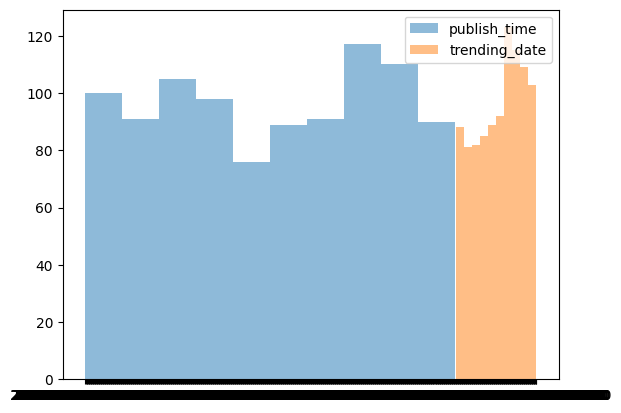

In [49]:
plt.hist(popular['publish_time'], alpha=0.5, label='publish_time')
plt.hist(popular['trending_date'], alpha=0.5, label='trending_date')
plt.legend(loc='upper right')

<Axes: >

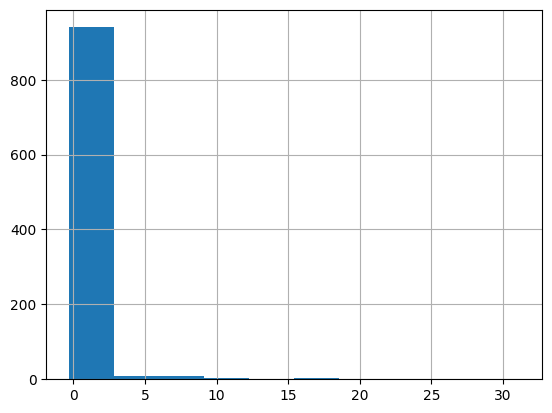

In [50]:
popular['days_till_trending'].hist()

Most trending videos in Japan were on the trending board within 3 days after its publish time.

In [51]:
popular['days_till_trending'].mean()

1.082795635604581

In [52]:
popular['days_till_trending'].median()

0.7291666666666666

In [53]:
popular['days_till_trending'].mode()

0    0.729167
Name: days_till_trending, dtype: float64

News & Politics        0.8379629629629629
Film & Animation       0.687494212962963
Science & Technology   1.1228703703703704
People & Blogs         1.0109027777777777
Comedy                 0.8438888888888889
Entertainment          0.6840277777777778
Howto & Style          0.5371122685185186
Autos & Vehicles       1.597037037037037
Sports                 0.7689178240740742
Music                  0.49997685185185187
Gaming                 0.9085185185185185
Education              0.3283449074074074


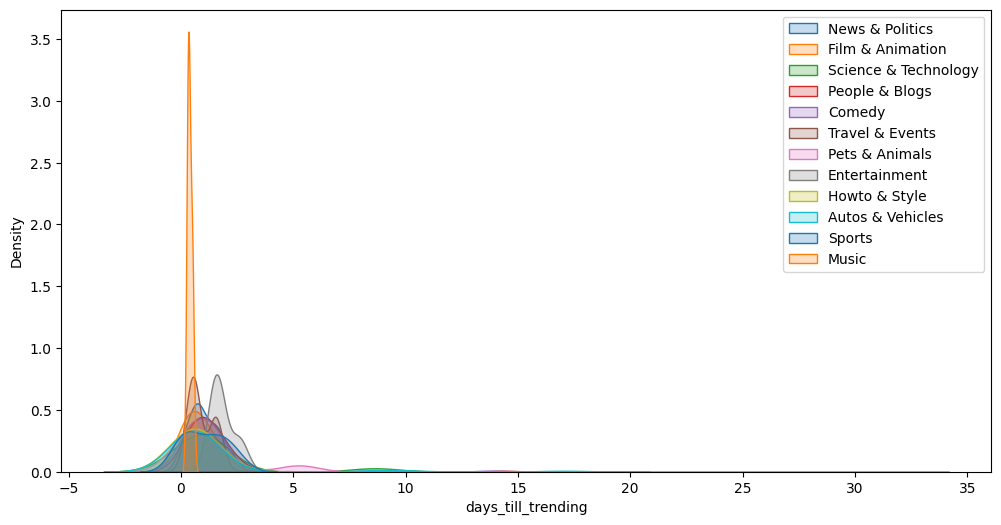

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))
popular_time = []
target_categories = videos['snippet.title'].unique()

for category in target_categories:
    popular = videos[(videos['snippet.title']==category) & (videos['views']>=1000000)]
    if abs(popular['days_till_trending'].mean() - popular['days_till_trending'].median()) < 0.001:
        # Remove outliers
        continue
    sns.kdeplot(popular['days_till_trending'], fill = True)
    plt.legend(labels=videos['snippet.title'].unique())
    print(category.ljust(22," "), popular['days_till_trending'].median())
    popular_time.append([category, popular['days_till_trending'].median()])

In [55]:
popular_time = pd.DataFrame(popular_time)
popular_time

,0,1
0,News & Politics,0.837963
1,Film & Animation,0.687494
2,Science & Technology,1.122870
3,People & Blogs,1.010903
4,Comedy,0.843889
5,Entertainment,0.684028
6,Howto & Style,0.537112
7,Autos & Vehicles,1.597037
8,Sports,0.768918
9,Music,0.499977


## Summary

- Previous analysis implies that Youtube videos in the music category with certain tags are more likely to trend in Japan. Engagement metrics such as likes, dislikes, and number of comments have a significant impact on a video's trending potential. In addition, the time of release and the initial performance of the video play a critical role in its virality, as most popular videos start trending within 2 days of being uploaded.

## Reference

Data
- [kaggle](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset/data?select=JP_youtube_trending_data.csv)

Algorithm and Methods
- [Decision Tree](https://www.datacamp.com/tutorial/decision-tree-classification-python)
- [Random Forest](https://www.geeksforgeeks.org/random-forest-regression-in-python/)
- [kde plot](https://www.geeksforgeeks.org/random-forest-regression-in-python/)
- Math 10 Course website

Thanks for reading :)